Standardization of the data:

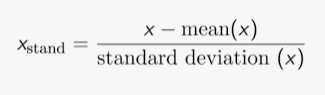

This will result into data between -3 to +3 standard
Standardization can be implemented all time.
Scalling should be done after the train test split. That means both x-train and x-test should scale separately.


Normalization of the data:
    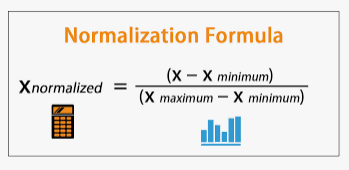
Normalization will be used whenever data is normally distributed. Most of the features are normally distributed.
All values are between 0 and 1

In [2]:
from sklearn.preprocessing import StandardScaler
import numpy as np

In [3]:
x= np.array([[1,3],[4,9],[3,100]])

In [4]:
x

array([[  1,   3],
       [  4,   9],
       [  3, 100]])

In [5]:
uniqs, counts = np.unique(x, return_counts= True)
uniqs,counts

(array([  1,   3,   4,   9, 100]), array([1, 2, 1, 1, 1], dtype=int64))

In [6]:
x.size

6

In [7]:
x.mean()

20.0

In [8]:
x_diff_mean = x - x.mean()
x_diff_mean

array([[-19., -17.],
       [-16., -11.],
       [-17.,  80.]])

In [9]:
((x - x.mean())**2).mean()

1286.0

In [10]:
x.var()

1286.0

In [11]:
x.std()

35.86084215408221

### variance is the variabililty (volatility) from the mean

In [23]:
((x-x.mean())**2).sum()/x.size

1286.0

In [27]:
su = []
for i in x:
    print(i)
    su.append(((i- x.mean())**2)) 
    print("---", su)
    
print(su)
var1 = np.array(su).sum() / (x.size-1)
var1

[1 3]
--- [array([361., 289.])]
[4 9]
--- [array([361., 289.]), array([256., 121.])]
[  3 100]
--- [array([361., 289.]), array([256., 121.]), array([ 289., 6400.])]
[array([361., 289.]), array([256., 121.]), array([ 289., 6400.])]


1543.2

In [ ]:
list1=[10,12,23,5,56]

for i in range(len(list1)):
  print(i, list1[i])

0 10
1 12
2 23
3 5
4 56


In [ ]:
np.sqrt(var1)

35.86084215408221

In [ ]:
x.std()

35.86084215408221

In [29]:
import pandas as pd
x_df = pd.DataFrame(x)
x_df

,0,1
0,1,3
1,4,9
2,3,100


In [39]:
x_df.mean()

0     2.666667
1    37.333333
dtype: float64

In [36]:
x_df[0].mean()

2.6666666666666665

In [31]:
x_df[0]

0    1
1    4
2    3
Name: 0, dtype: int32

In [32]:
x_df[1][1:,]

1      9
2    100
Name: 1, dtype: int32

C:\Users\Amrita\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='0', ylabel='Density'>

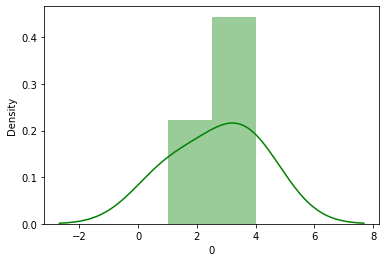

In [33]:
import seaborn as sns
sns.distplot(x_df[0], color = 'green')

In [34]:
x_df[0].skew()

-0.9352195295828235

C:\Users\Amrita\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='1', ylabel='Density'>

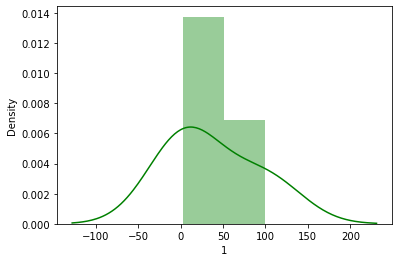

In [41]:
import seaborn as sns
sns.distplot(x_df[1], color = 'green')

<AxesSubplot:ylabel='Density'>

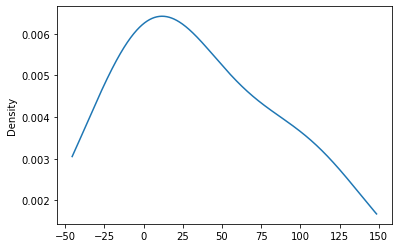

In [42]:
x_df[1].plot(kind='kde')

In [22]:
x_df

,0,1
0,1,3
1,4,9
2,3,100


In [23]:
from sklearn import preprocessing
X_scaled = preprocessing.scale(x_df)

In [24]:
X_scaled

array([[-1.33630621, -0.77362742],
       [ 1.06904497, -0.63843039],
       [ 0.26726124,  1.41205781]])

## Scaled data has 0 mean and unit variance

In [25]:
X_scaled[:,0]

array([-1.33630621,  1.06904497,  0.26726124])

In [8]:
X_scaled.mean(), X_scaled.var()  

(7.401486830834377e-17, 1.0000000000000002)

In [26]:
x_prep_df = pd.DataFrame(X_scaled)
x_prep_df

,0,1
0,-1.336306,-0.773627
1,1.069045,-0.638430
2,0.267261,1.412058


C:\Users\Amrita\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='1', ylabel='Density'>

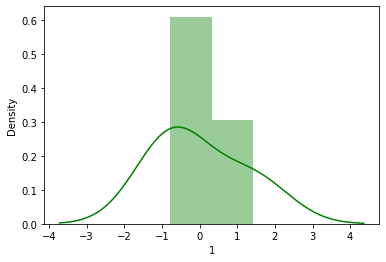

In [27]:
sns.distplot(x_prep_df[1], color = 'green')

### In practice we often ignore the shape of the distribution and just transform the data to center it by removing the mean value of each feature, then scale it by dividing non-constant features by their standard deviation.

For instance, many elements used in the objective function of a learning algorithm (such as the RBF kernel of Support Vector Machines or the l1 and l2 regularizers of linear models) assume that all features are centered around zero and have variance in the same order. If a feature has a variance that is orders of magnitude larger than others, it might dominate the objective function and make the estimator unable to learn from other features correctly as expected.

In [ ]:
x

array([[  1,   3],
       [  4,   9],
       [  3, 100]])

In [28]:
from sklearn.preprocessing import StandardScaler 
scaler1 = StandardScaler(with_mean=  True,)

In [17]:
scaler1.with_mean

True

In [18]:
scaler1.with_std

True

In [29]:
ss= scaler1.fit(x)
ss

StandardScaler()

In [30]:
ss.transform(x)

array([[-1.33630621, -0.77362742],
       [ 1.06904497, -0.63843039],
       [ 0.26726124,  1.41205781]])

In [21]:
ss=scaler1.fit_transform(x)
ss

array([[-1.33630621, -0.77362742],
       [ 1.06904497, -0.63843039],
       [ 0.26726124,  1.41205781]])

In [ ]:
## with_mean=False
ss=scaler.fit_transform(x)
ss

array([[-1.33630621, -0.77362742],
       [ 1.06904497, -0.63843039],
       [ 0.26726124,  1.41205781]])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


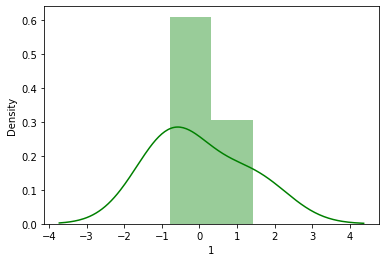

In [ ]:
ss_df=pd.DataFrame(ss)
sns.distplot(ss_df[1], color = 'green')

## The scaler instance can then be used on new data to transform it the same way it did on the training set:

In [ ]:
X_test = [[-1., 1.]]

In [ ]:
scaler.transform(X_test) 

array([[-2.93987366, -0.81869309]])

In [ ]:
### df = pd.read_excel(r"C:\Users\User\Desktop\Machine Learning\datasets\flu.xlsx")

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
data = pd.DataFrame([[0, 0], [0, 0], [1, 1], [1, 1]])
data

,0,1
0,0,0
1,0,0
2,1,1
3,1,1


In [ ]:
scaler = StandardScaler()

In [ ]:
print(scaler.fit(data))

StandardScaler(copy=True, with_mean=True, with_std=True)


In [ ]:
print(scaler.mean_)

[0.5 0.5]


In [ ]:
print(scaler.transform(data))

[[-1. -1.]
 [-1. -1.]
 [ 1.  1.]
 [ 1.  1.]]


In [ ]:
scaler.transform([[2, 2]])

array([[3., 3.]])

In [31]:
data = pd.DataFrame([[2,  ], [np.nan, 0], [1, ], [1, 1],[np.nan,2]])
data

,0,1
0,2.0,NaN
1,NaN,0.0
2,1.0,NaN
3,1.0,1.0
4,NaN,2.0


In [33]:
from sklearn.preprocessing import Imputer

ImportError: cannot import name 'Imputer' from 'sklearn.preprocessing' (C:\Users\Amrita\anaconda3\lib\site-packages\sklearn\preprocessing\__init__.py)

In [32]:
imputer= Imputer(axis = 0, strategy = 'mean')

NameError: name 'Imputer' is not defined

In [ ]:
imputer.fit(data)

Imputer(axis=0, copy=True, missing_values='NaN', strategy='mean', verbose=0)

In [ ]:
imputer.transform(data)

array([[2.        , 1.        ],
       [1.33333333, 0.        ],
       [1.        , 1.        ],
       [1.        , 1.        ],
       [1.33333333, 2.        ]])

In [ ]:
imputer.fit_transform(data)

array([[2., 2.],
       [0., 0.],
       [1., 1.],
       [1., 1.],
       [2., 2.]])

# RobustScaler

1.   List item
2.   List item


Scale features using statistics that are robust to outliers.

This Scaler removes the median and scales the data according to the quantile range (defaults to IQR: Interquartile Range). The IQR is the range between the 1st quartile (25th quantile) and the 3rd quartile (75th quantile).

Centering and scaling happen independently on each feature by computing the relevant statistics on the samples in the training set. Median and interquartile range are then stored to be used on later data using the transform method.

Standardization of a dataset is a common requirement for many machine learning estimators. Typically this is done by removing the mean and scaling to unit variance. However, outliers can often influence the sample mean / variance in a negative way. In such cases, the median and the interquartile range often give better results.

In [49]:
from sklearn.preprocessing import RobustScaler
import numpy as np
import pandas as pd

In [50]:
X = [[ 1., -2.,  2., 0], [ -2.,  1.,  3.,25],[ 7.,  1., -2., 50] ,[3,2,7,75], [1,9,3,100]]
pd.DataFrame(X)

,0,1,2,3
0,1.0,-2.0,2.0,0
1,-2.0,1.0,3.0,25
2,7.0,1.0,-2.0,50
3,3.0,2.0,7.0,75
4,1.0,9.0,3.0,100


In [24]:
type(X)

list

In [51]:
b=RobustScaler().fit(X)

In [52]:
type(b)

sklearn.preprocessing._data.RobustScaler

In [19]:
type(b)

sklearn.preprocessing._data.RobustScaler

In [53]:
a=b.transform(X)
a

array([[ 0. , -3. , -1. , -1. ],
       [-1.5,  0. ,  0. , -0.5],
       [ 3. ,  0. , -5. ,  0. ],
       [ 1. ,  1. ,  4. ,  0.5],
       [ 0. ,  8. ,  0. ,  1. ]])

# MinMaxScaler

---


Transforms features by scaling each feature to a given range.

This estimator scales and translates each feature individually such that it is in the given range on the training set, 
e.g. between zero and one.

In [1]:
from sklearn.preprocessing import MinMaxScaler

In [7]:
data = [[-1, 2], [-0.5, 6], [1, 15],[0, 10], [0, 18]]
data

[[-1, 2], [-0.5, 6], [1, 15], [0, 10], [0, 18]]

In [8]:
import pandas as pd
pd.DataFrame(data)

,0,1
0,-1.0,2
1,-0.5,6
2,1.0,15
3,0.0,10
4,0.0,18


In [9]:
scaler = MinMaxScaler()
scaler.fit(data)

MinMaxScaler()

In [10]:
scaler.data_max_

array([ 1., 18.])

In [11]:
scaler.transform(data)

array([[0.    , 0.    ],
       [0.25  , 0.25  ],
       [1.    , 0.8125],
       [0.5   , 0.5   ],
       [0.5   , 1.    ]])

#  MaxAbsScaler
Scale each feature by its maximum absolute value.

This estimator scales and translates each feature individually such that the maximal absolute value of each feature in the training set will be 1.0. It does not shift/center the data, and thus does not destroy any sparsity.

This scaler can also be applied to sparse CSR or CSC matrices.

In [14]:
from sklearn.preprocessing import MaxAbsScaler 

In [15]:
X = [[ 1., -1.,  2.],[ 2.,  0.,  3],[ 2.,  1., -5.]]
X
pd.DataFrame(X)

,0,1,2
0,1.0,-1.0,2.0
1,2.0,0.0,3.0
2,2.0,1.0,-5.0


In [16]:
mas= MaxAbsScaler()

In [17]:
mas.fit(X)

MaxAbsScaler()

In [18]:
#@title Default title text
mas.transform(X)

array([[ 0.5, -1. ,  0.4],
       [ 1. ,  0. ,  0.6],
       [ 1. ,  1. , -1. ]])

In [1]:
import pandas as pd

In [3]:
pd.__version__

'1.1.3'